In [3]:
#importing liberaries
import tensorflow as tf
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import mean_absolute_error
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pathlib
import tensorflow_datasets as tfds
import os
import time
import cv2
import pickle
from keras.preprocessing import image
import matplotlib.pyplot as plot
from datetime import datetime, timedelta
from keras.preprocessing.image import img_to_array
from tabulate import tabulate
from tensorflow.keras.optimizers import Adam
import requests
from os import listdir
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.utils import to_categorical
from numpy import argmax
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.metrics import Accuracy
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [4]:
Batch_size =32
Image_size = (96,96)
directory_root = '/kaggle/input/vitiligo-dataset/Vitiligo DS'
default_image_size = tuple((96, 96))

In [5]:
files = os.listdir(directory_root)
print(files)

['vitiligo', 'Healthy Skin']


In [6]:
#creating image list containing all Dataset images as directories
image_dir_list = []
label_list = []
print("[INFO] Loading images ...")
root_dir = listdir(directory_root)
for plant_disease_folder in root_dir:
    plant_disease_dir = listdir(f"{directory_root}/{plant_disease_folder}")
    for image in plant_disease_dir:
        plant_image_dir = f"{directory_root}/{plant_disease_folder}/{image}"
        if plant_image_dir.endswith(".jpg") == True or plant_image_dir.endswith(".JPG") == True:
            image_dir_list.append(plant_image_dir)
            label_list.append(plant_disease_folder)

[INFO] Loading images ...


In [7]:
print(len(label_list))

1202


In [8]:
print(len(image_dir_list))

1202


In [9]:
images_list= []
for image_dir in image_dir_list:
    if image_dir.endswith(".jpg") == True or image_dir.endswith(".JPG") == True:
        image = cv2.imread(image_dir)
        image = cv2.resize(image, default_image_size)   
        image_array = img_to_array(image)
        images_list.append(image_array)

In [10]:
print(len(images_list))

1202


In [11]:
#binarizing labels
label_binarizer = LabelBinarizer()
image_labels = label_binarizer.fit_transform(label_list)
pickle.dump(label_binarizer,open('label_transform.pkl', 'wb'))
n_classes = len(label_binarizer.classes_)

In [12]:
print(label_binarizer.classes_)

['Healthy Skin' 'vitiligo']


In [13]:
np_image_list = np.array(images_list, dtype=np.float16) / 255.0
print(np_image_list.shape)
np.random.shuffle(np_image_list)
np.random.shuffle(image_labels)

(1202, 96, 96, 3)


In [14]:
x_train, x_test, y_train, y_test = train_test_split(np_image_list, image_labels, test_size=0.3, random_state = 42)

In [15]:
#defining base model
base_model = tf.keras.applications.MobileNet(include_top=False,weights="imagenet",input_shape=(96,96,3))
base_model.trainable = True #  freezing all layers
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
prediction_layer = tf.keras.layers.Dense(units=1, activation='sigmoid')(global_average_layer)
model = tf.keras.models.Model(inputs= base_model.input, outputs=prediction_layer)

2022-11-26 23:07:56.621646: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-26 23:07:56.719566: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-26 23:07:56.720372: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-26 23:07:56.721979: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

17235968/17225924 [==============================] - 0s 0us/step


In [16]:
model.compile(loss="binary_crossentropy", optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0001),metrics=["accuracy"])

In [17]:
History = model.fit(x_train,y_train,epochs = 30)

2022-11-26 23:08:26.291991: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/30


2022-11-26 23:08:31.192155: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


27/27 [==============================] - 12s 39ms/step - loss: 0.8549 - accuracy: 0.5577
Epoch 2/30
27/27 [==============================] - 1s 36ms/step - loss: 0.3786 - accuracy: 0.8323
Epoch 3/30
27/27 [==============================] - 1s 33ms/step - loss: 0.2710 - accuracy: 0.8966
Epoch 4/30
27/27 [==============================] - 1s 33ms/step - loss: 0.1742 - accuracy: 0.9548
Epoch 5/30
27/27 [==============================] - 1s 33ms/step - loss: 0.1403 - accuracy: 0.9548
Epoch 6/30
27/27 [==============================] - 1s 33ms/step - loss: 0.0967 - accuracy: 0.9727
Epoch 7/30
27/27 [==============================] - 1s 33ms/step - loss: 0.0780 - accuracy: 0.9738
Epoch 8/30
27/27 [==============================] - 1s 33ms/step - loss: 0.0831 - accuracy: 0.9703
Epoch 9/30
27/27 [==============================] - 1s 33ms/step - loss: 0.0536 - accuracy: 0.9905
Epoch 10/30
27/27 [==============================] - 1s 33ms/step - loss: 0.0472 - accuracy: 0.9881
Epoch 11/30
27/27 [

In [18]:
test_pred = model.predict_generator(x_test)
train_pred = model.predict(x_train)

/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


In [19]:
train_pred = train_pred > 0.5
test_pred = test_pred > 0.5

In [20]:
model_accuracy = accuracy_score(y_train , train_pred)
print(model_accuracy*100)

99.88109393579072


In [24]:
model_accuracy = accuracy_score(y_test , test_pred)
print(model_accuracy*100)

59.0027700831025


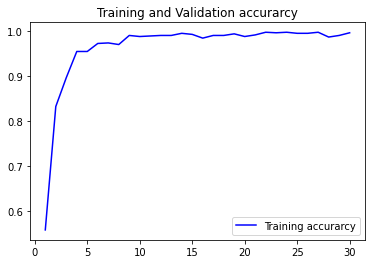

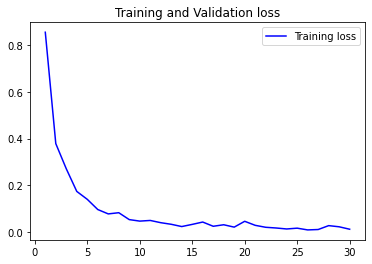

In [25]:
acc = History.history['accuracy']
#val_acc = History.history['val_accuracy']
loss = History.history['loss']
val_loss = History.history['loss']
epochs = range(1, len(acc) + 1)
#Train and validation accuracy
plot.plot(epochs, acc, 'b', label='Training accurarcy')
#plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plot.title('Training and Validation accurarcy')
plot.legend()

plot.figure()
#Train and validation loss
plot.plot(epochs, loss, 'b', label='Training loss')
#plt.plot(epochs, val_loss, 'r', label='Validation loss')
plot.title('Training and Validation loss')
plot.legend()
plot.show()